In [190]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [10]:
raw_data = pd.read_csv('fullsample.csv')

In [161]:
raw_data.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


In [162]:
raw_data[raw_data["EXITCODE"]!="0:0"]

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
18,31418105,NODE_FAIL,2021-08-19 10:09:50,2021-09-17 08:45:10,92160Mn,0,41-16:00:00,28-22:35:20,1,8,cgw-dougherty1,1:0
42,31669402,CANCELLED,2021-08-28 10:53:59,2021-09-05 10:53:57,65536Mn,5229.75M,8-00:00:00,7-23:59:58,9,10,production,0:15
1023,31798622,CANCELLED,2021-08-31T02:46:09,2021-09-05T02:46:09,40960Mn,1440.95M,5-00:00:00,5-00:00:00,4,4,turing,0:15
1029,31798672,CANCELLED,2021-08-31T02:53:48,2021-09-05T02:54:09,40960Mn,1438.46M,5-00:00:00,5-00:00:21,4,4,turing,0:15
1212,31807053,CANCELLED,2021-08-31T09:28:28,2021-09-01T08:10:32,16384Mn,11784.19M,2-00:00:00,22:42:04,1,1,production,0:9
...,...,...,...,...,...,...,...,...,...,...,...,...
7387597,25469985_9,CANCELLED,2020-10-30T13:46:03,2020-10-31T13:46:06,8192Mn,5018.02M,1-00:00:00,1-00:00:03,1,4,production,0:15
7387598,25469985_10,FAILED,2020-10-30T13:46:33,2020-10-30T13:46:54,8192Mn,0,1-00:00:00,00:00:21,1,4,production,1:0
7387599,25469985_11,FAILED,2020-10-30T13:46:26,2020-10-30T13:46:37,8192Mn,11.43M,1-00:00:00,00:00:11,1,4,production,1:0
7387600,25469985_12,FAILED,2020-10-30T13:46:29,2020-10-30T13:46:37,8192Mn,0,1-00:00:00,00:00:08,1,4,production,1:0


In [163]:
raw_data["EXITCODE"].unique()

array(['0:0', '1:0', '0:15', '0:9', '121:0', '0:125', '3:0', '6:0', '2:0',
       '127:0', '4:0', '0:7', '126:0', '24:0', '13:0', '0:2', '0:11',
       '125:0', '0:6', '29:0', '59:0', '43:0', '28:0', '67:0', '9:0',
       '7:0', '103:0', '0:8', '11:0', '38:0', '0:105', '8:0', '16:0',
       '76:0', '0:40', '0:98', '30:0', '0:12', '85:0', '116:0'],
      dtype=object)

In [164]:
#doge['rolling_7_day_average'] = doge.rolling('7d', on = 'Date')['Close'].mean()
#raw_data["rolling_7_day_average"] = raw_data

ValueError: Wrong number of items passed 12, placement implies 1

In [177]:
test_df = raw_data[1:1000]

In [178]:
test_df['BEGIN'] = test_df['BEGIN'].str.replace('T',' ')
test_df['END'] = test_df['END'].str.replace('T',' ')

In [179]:
test_df["EXITCODE"].unique()

array(['0:0', '1:0', '0:15'], dtype=object)

In [180]:
test_df['BEGIN'] = test_df['BEGIN'].astype("datetime64[ns]")
test_df['END'] = test_df['END'].astype("datetime64[ns]")
print(test_df)

          JOBID      STATE               BEGIN                 END    REQMEM  \
1      30853133  COMPLETED 2021-08-06 11:36:09 2021-09-05 11:36:32  262144Mn   
2      30858137  COMPLETED 2021-08-06 19:04:39 2021-09-05 19:04:53  204800Mn   
3      30935078  COMPLETED 2021-08-09 16:52:51 2021-09-07 20:52:55   65536Mn   
4    31364111_2  COMPLETED 2021-08-17 07:45:07 2021-09-10 16:45:24   16384Mn   
5    31364111_3  COMPLETED 2021-08-17 07:45:07 2021-09-06 16:17:34   16384Mn   
..          ...        ...                 ...                 ...       ...   
995    31796423  COMPLETED 2021-08-31 00:58:18 2021-09-01 16:57:55    5000Mn   
996    31796437  COMPLETED 2021-08-31 00:58:18 2021-09-01 20:19:26    5000Mn   
997    31796438  COMPLETED 2021-08-31 00:58:18 2021-09-01 16:18:09    5000Mn   
998    31796505  COMPLETED 2021-08-31 01:16:17 2021-09-01 18:22:54   28000Mn   
999    31796508  COMPLETED 2021-08-31 01:18:18 2021-09-01 05:29:20    5000Mn   

       USEDMEM      REQTIME     USEDTIM

In [181]:
test_df['Difference'] = (test_df['BEGIN'] - test_df['END']).dt.seconds
print(test_df)
print(test_df[['Difference','USEDTIME']])

          JOBID      STATE               BEGIN                 END    REQMEM  \
1      30853133  COMPLETED 2021-08-06 11:36:09 2021-09-05 11:36:32  262144Mn   
2      30858137  COMPLETED 2021-08-06 19:04:39 2021-09-05 19:04:53  204800Mn   
3      30935078  COMPLETED 2021-08-09 16:52:51 2021-09-07 20:52:55   65536Mn   
4    31364111_2  COMPLETED 2021-08-17 07:45:07 2021-09-10 16:45:24   16384Mn   
5    31364111_3  COMPLETED 2021-08-17 07:45:07 2021-09-06 16:17:34   16384Mn   
..          ...        ...                 ...                 ...       ...   
995    31796423  COMPLETED 2021-08-31 00:58:18 2021-09-01 16:57:55    5000Mn   
996    31796437  COMPLETED 2021-08-31 00:58:18 2021-09-01 20:19:26    5000Mn   
997    31796438  COMPLETED 2021-08-31 00:58:18 2021-09-01 16:18:09    5000Mn   
998    31796505  COMPLETED 2021-08-31 01:16:17 2021-09-01 18:22:54   28000Mn   
999    31796508  COMPLETED 2021-08-31 01:18:18 2021-09-01 05:29:20    5000Mn   

       USEDMEM      REQTIME     USEDTIM

In [ ]:
test_df

In [182]:
test_df = test_df.sort_values("END")

In [183]:
#doge['rolling_7_day_average'] = doge.rolling('7d', on = 'Date')['Close'].mean()
#traffic['total_crashes_30_days'] = (traffic
 #.rolling('30d', on = 'Date and Time')['Accident Number']
 #.count())
test_df["rolling_1_hour_average"] = (test_df.rolling("1h", on = "END")["EXITCODE"].count())

In [184]:
test_df[100:150]

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,Difference,rolling_1_hour_average
75,31762043,COMPLETED,2021-08-30 05:30:58,2021-09-01 04:06:04,5000Mn,3654.32M,2-00:00:00,1-22:35:06,1,1,production,0:0,5094,14.0
588,31787679,COMPLETED,2021-08-30 21:37:24,2021-09-01 04:11:43,5000Mn,3865.38M,2-00:00:00,1-06:34:19,1,1,production,0:0,62741,15.0
873,31793270,COMPLETED,2021-08-30 21:25:24,2021-09-01 04:12:40,5000Mn,3788.96M,2-00:00:00,1-06:47:16,1,1,production,0:0,61964,16.0
883,31793290,COMPLETED,2021-08-30 21:31:24,2021-09-01 04:17:11,5000Mn,4061.59M,2-00:00:00,1-06:45:47,1,1,production,0:0,62053,17.0
783,31792078,COMPLETED,2021-08-30 19:59:22,2021-09-01 04:18:22,5000Mn,3629.86M,2-00:00:00,1-08:19:00,1,1,production,0:0,56460,18.0
863,31793113,COMPLETED,2021-08-30 21:20:24,2021-09-01 04:19:16,5000Mn,2964.78M,2-00:00:00,1-06:58:52,1,1,production,0:0,61268,18.0
694,31791369,COMPLETED,2021-08-30 19:40:22,2021-09-01 04:22:10,5000Mn,3414.46M,2-00:00:00,1-08:41:48,1,1,production,0:0,55092,19.0
690,31791333,COMPLETED,2021-08-30 19:39:22,2021-09-01 04:24:25,5000Mn,3588.28M,2-00:00:00,1-08:45:03,1,1,production,0:0,54897,19.0
78,31762260,COMPLETED,2021-08-30 06:02:59,2021-09-01 04:25:46,28000Mn,15644.04M,2-00:00:00,1-22:22:47,1,4,production,0:0,5833,19.0
810,31792285,COMPLETED,2021-08-30 20:30:23,2021-09-01 04:26:26,71680Mn,25120.50M,3-00:00:00,1-07:56:03,1,4,production,0:0,57837,20.0


In [185]:
test_df = test_df.reset_index(drop=True)
print(test_df)

            JOBID      STATE               BEGIN                 END  \
0        31760936  COMPLETED 2021-08-30 00:34:58 2021-09-01 00:01:24   
1        31777050  COMPLETED 2021-08-30 11:46:02 2021-09-01 00:02:44   
2    31793401_987  COMPLETED 2021-08-31 20:33:46 2021-09-01 00:02:57   
3        31791925  COMPLETED 2021-08-30 19:48:22 2021-09-01 00:06:12   
4        31760939  COMPLETED 2021-08-30 00:47:40 2021-09-01 00:06:20   
..            ...        ...                 ...                 ...   
994    31364111_8  COMPLETED 2021-08-25 00:42:46 2021-09-16 18:49:44   
995   31364111_24  COMPLETED 2021-08-25 00:42:46 2021-09-16 21:53:04   
996    31364111_7  COMPLETED 2021-08-25 00:42:46 2021-09-16 21:55:36   
997   31364111_23  COMPLETED 2021-08-25 00:42:46 2021-09-16 23:57:20   
998      31418105  NODE_FAIL 2021-08-19 10:09:50 2021-09-17 08:45:10   

       REQMEM     USEDMEM      REQTIME     USEDTIME  NODES  CPUS  \
0     42994Mn   26709.77M   2-00:00:00   1-23:26:26      1    12   

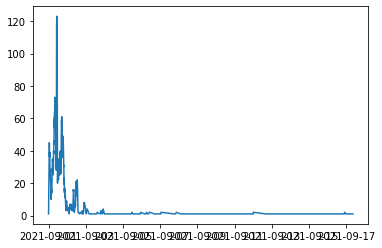

In [196]:
plt.plot((test_df["END"]),test_df["rolling_1_hour_average"])

plt.show()

In [176]:
print(test_df)

None


In [64]:
#splits time in month and hour columns
begin_time_df = test_df["BEGIN"].str.split("T",1,expand=True)
begin_named_time_df = begin_time_df.rename(columns={0:"begin_date",1:"begin_time"})
end_time_df = test_df["END"].str.split("T",1,expand=True)
end_named_time_df = end_time_df.rename(columns={0:"end_date",1:"end_time"})
be_time_df = begin_named_time_df.join(end_named_time_df)
be_time_df["begin_date"] = be_time_df["begin_date"].astype("datetime64[ns]")
be_time_df["end_date"] = be_time_df["end_date"].astype("datetime64[ns]")
be_time_df["begin_time"] = be_time_df["begin_time"].astype("datetime64[ns]")
be_time_df["end_time"] = be_time_df["end_time"].astype("datetime64[ns]")
print(be_time_df)

   begin_date          begin_time   end_date            end_time
1  2021-08-06 2021-10-28 11:36:09 2021-09-05 2021-10-28 11:36:32
2  2021-08-06 2021-10-28 19:04:39 2021-09-05 2021-10-28 19:04:53
3  2021-08-09 2021-10-28 16:52:51 2021-09-07 2021-10-28 20:52:55
4  2021-08-17 2021-10-28 07:45:07 2021-09-10 2021-10-28 16:45:24
5  2021-08-17 2021-10-28 07:45:07 2021-09-06 2021-10-28 16:17:34
6  2021-08-17 2021-10-28 07:45:07 2021-09-06 2021-10-28 06:25:11
7  2021-08-17 2021-10-28 07:45:07 2021-09-06 2021-10-28 10:05:33
8  2021-08-17 2021-10-28 07:45:07 2021-09-05 2021-10-28 12:53:04
9  2021-08-17 2021-10-28 07:45:07 2021-09-06 2021-10-28 09:10:13
10 2021-08-17 2021-10-28 07:45:07 2021-09-06 2021-10-28 08:08:53
11 2021-08-17 2021-10-28 07:45:07 2021-09-05 2021-10-28 22:42:38
12 2021-08-17 2021-10-28 07:45:07 2021-09-06 2021-10-28 05:46:58
13 2021-08-17 2021-10-28 07:45:07 2021-09-07 2021-10-28 00:57:05
14 2021-08-17 2021-10-28 07:45:07 2021-09-05 2021-10-28 22:47:23
15 2021-08-17 2021-10-28 

In [65]:
test_time_df = test_df.join(be_time_df)
print(test_time_df)

          JOBID      STATE                BEGIN                  END  \
1      30853133  COMPLETED  2021-08-06T11:36:09  2021-09-05T11:36:32   
2      30858137  COMPLETED  2021-08-06T19:04:39  2021-09-05T19:04:53   
3      30935078  COMPLETED  2021-08-09T16:52:51  2021-09-07T20:52:55   
4    31364111_2  COMPLETED  2021-08-17T07:45:07  2021-09-10T16:45:24   
5    31364111_3  COMPLETED  2021-08-17T07:45:07  2021-09-06T16:17:34   
6    31364111_4  COMPLETED  2021-08-17T07:45:07  2021-09-06T06:25:11   
7    31364111_5  COMPLETED  2021-08-17T07:45:07  2021-09-06T10:05:33   
8    31364111_6  COMPLETED  2021-08-17T07:45:07  2021-09-05T12:53:04   
9    31364111_9  COMPLETED  2021-08-17T07:45:07  2021-09-06T09:10:13   
10  31364111_10  COMPLETED  2021-08-17T07:45:07  2021-09-06T08:08:53   
11  31364111_13  COMPLETED  2021-08-17T07:45:07  2021-09-05T22:42:38   
12  31364111_14  COMPLETED  2021-08-17T07:45:07  2021-09-06T05:46:58   
13  31364111_15  COMPLETED  2021-08-17T07:45:07  2021-09-07T00:5

In [68]:
test_time_df['Difference'] = (test_time_df['begin_time'] - test_time_df['end_time']).dt.seconds
print(test_time_df)

          JOBID      STATE                BEGIN                  END  \
1      30853133  COMPLETED  2021-08-06T11:36:09  2021-09-05T11:36:32   
2      30858137  COMPLETED  2021-08-06T19:04:39  2021-09-05T19:04:53   
3      30935078  COMPLETED  2021-08-09T16:52:51  2021-09-07T20:52:55   
4    31364111_2  COMPLETED  2021-08-17T07:45:07  2021-09-10T16:45:24   
5    31364111_3  COMPLETED  2021-08-17T07:45:07  2021-09-06T16:17:34   
6    31364111_4  COMPLETED  2021-08-17T07:45:07  2021-09-06T06:25:11   
7    31364111_5  COMPLETED  2021-08-17T07:45:07  2021-09-06T10:05:33   
8    31364111_6  COMPLETED  2021-08-17T07:45:07  2021-09-05T12:53:04   
9    31364111_9  COMPLETED  2021-08-17T07:45:07  2021-09-06T09:10:13   
10  31364111_10  COMPLETED  2021-08-17T07:45:07  2021-09-06T08:08:53   
11  31364111_13  COMPLETED  2021-08-17T07:45:07  2021-09-05T22:42:38   
12  31364111_14  COMPLETED  2021-08-17T07:45:07  2021-09-06T05:46:58   
13  31364111_15  COMPLETED  2021-08-17T07:45:07  2021-09-07T00:5

In [11]:
time_ex = raw_data["BEGIN"][1]
print(raw_data["BEGIN"][1])

2021-08-06T11:36:09


In [19]:
new_time = time_ex.split("T",1)
new_format_time = new_time[0] + " " + new_time[1]
print(new_format_time)

2021-08-06 11:36:09


In [24]:
print(datetime.strptime(new_format_time, '%Y-%m-%d %H:%M:%S'))

2021-08-06 11:36:09
